# Classifying newswires: a multiclass classification example

# Loading the Reuters dataset

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [3]:
 len(train_data)

8982

In [4]:
 len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

# Decoding newswires back to text

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [7]:
train_labels[10]

3

# Encoding the data

In [10]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


# Building your network

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Compiling the model

In [13]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Setting aside a validation set

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training the model

In [15]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 8s 948us/sample - loss: 2.7698 - accuracy: 0.5143 - val_loss: 1.8313 - val_accuracy: 0.6350
Epoch 2/20
7982/7982 [==============================] - 2s 289us/sample - loss: 1.4878 - accuracy: 0.6919 - val_loss: 1.3405 - val_accuracy: 0.7050
Epoch 3/20
7982/7982 [==============================] - 2s 221us/sample - loss: 1.0891 - accuracy: 0.7702 - val_loss: 1.1696 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 2s 198us/sample - loss: 0.8567 - accuracy: 0.8192 - val_loss: 1.0362 - val_accuracy: 0.7820
Epoch 5/20
7982/7982 [==============================] - 1s 187us/sample - loss: 0.6831 - accuracy: 0.8545 - val_loss: 0.9635 - val_accuracy: 0.7940
Epoch 6/20
7982/7982 [==============================] - 2s 201us/sample - loss: 0.5409 - accuracy: 0.8864 - val_loss: 0.9081 - val_accuracy: 0.8090
Epoch 7/20
7982/7982 [==============================] - 2s 217us

# Plotting the training and validation loss Plotting the training and validation loss

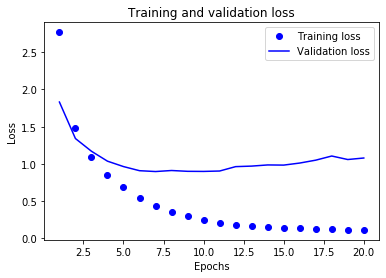

In [17]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy

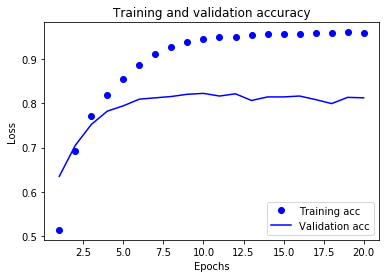

In [19]:
plt.clf()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Retraining a model from scratch

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 3s 330us/sample - loss: 2.4432 - accuracy: 0.5347 - val_loss: 1.6482 - val_accuracy: 0.6490
Epoch 2/9
7982/7982 [==============================] - 1s 186us/sample - loss: 1.3703 - accuracy: 0.7087 - val_loss: 1.2724 - val_accuracy: 0.7200
Epoch 3/9
7982/7982 [==============================] - 2s 196us/sample - loss: 1.0367 - accuracy: 0.7814 - val_loss: 1.1072 - val_accuracy: 0.7670
Epoch 4/9
7982/7982 [==============================] - 2s 224us/sample - loss: 0.8194 - accuracy: 0.8265 - val_loss: 1.0291 - val_accuracy: 0.7870
Epoch 5/9
7982/7982 [==============================] - 2s 193us/sample - loss: 0.6537 - accuracy: 0.8657 - val_loss: 0.9628 - val_accuracy: 0.8070
Epoch 6/9
7982/7982 [==============================] - 2s 218us/sample - loss: 0.5233 - accuracy: 0.8936 - val_loss: 0.9370 - val_accuracy: 0.8150
Epoch 7/9
7982/7982 [==============================] - 2s 197us/sample

In [21]:
results

[1.0099861190877424, 0.7809439]

In [23]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

# Generating predictions for new data

In [24]:
predictions = model.predict(x_test)

In [25]:
 predictions[0].shape

(46,)

In [26]:
np.sum(predictions[0])

1.0

In [27]:
 np.argmax(predictions[0])

3

# A different way to handle the labels and the loss

In [28]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [29]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])

# A model with an information bottleneck

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 433us/sample - loss: 2.9242 - accuracy: 0.3389 - val_loss: 2.1974 - val_accuracy: 0.4750
Epoch 2/20
7982/7982 [==============================] - 2s 302us/sample - loss: 1.7303 - accuracy: 0.5712 - val_loss: 1.5439 - val_accuracy: 0.6590
Epoch 3/20
7982/7982 [==============================] - 3s 331us/sample - loss: 1.2667 - accuracy: 0.6951 - val_loss: 1.3673 - val_accuracy: 0.6670
Epoch 4/20
7982/7982 [==============================] - 2s 294us/sample - loss: 1.0961 - accuracy: 0.7184 - val_loss: 1.3216 - val_accuracy: 0.6930
Epoch 5/20
7982/7982 [==============================] - 3s 335us/sample - loss: 0.9826 - accuracy: 0.7519 - val_loss: 1.2953 - val_accuracy: 0.6990
Epoch 6/20
7982/7982 [==============================] - 3s 380us/sample - loss: 0.8915 - accuracy: 0.7677 - val_loss: 1.2880 - val_accuracy: 0.7100
Epoch 7/20
7982/7982 [==============================] - 3s 319us